In [18]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import draft_functions as funk

In [2]:
ft = 10000
local_path = f'/storage/shared/oceanparcels/output_data/data_Claudio/hc13_3/hc13_10000.zarr'
sim = xr.open_zarr(local_path)
sim = sim.compute()

In [8]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 4500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 4494 4495 4496 4497 4498 4499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 34.75 ... nan nan
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... nan nan
    cons_temperature  (trajectory, obs) float32 0.755 0.7429 0.7481 ... nan nan
    density           (trajectory, obs) float32 1.028e+03 1.028e+03 ... nan nan
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... nan nan nan
    floored           (trajectory, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan
    ...                ...
    u                 (trajectory, obs) float32 0.0 3.982e-07 ... nan nan
    v                 (trajectory, obs) float32 0.0 -4.395e-07 ... nan nan
    v_s               (trajectory, obs) float32 8.861e-08 8.861e-08 ... nan nan
    w                 (trajectory, obs) float32 0.0 -0.0002692 ... nan nan
    z                 (trajectory, obs) float64 5e+03 5.023e+03 ... nan nan
    z_kz              (trajectory, obs) float32 0.0 0.8042 -1.242 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.2-148-gb7738e92

In [15]:
sim = xr.open_zarr(local_path)
sim = sim.where(sim.radius < 1e-6, drop=False)

depths = sim['z'].values

k1, k2 = np.where(depths < 10)
idx_particles, idx_k2 = np.unique(k1, return_index=True)
surface_time = k2[idx_k2]


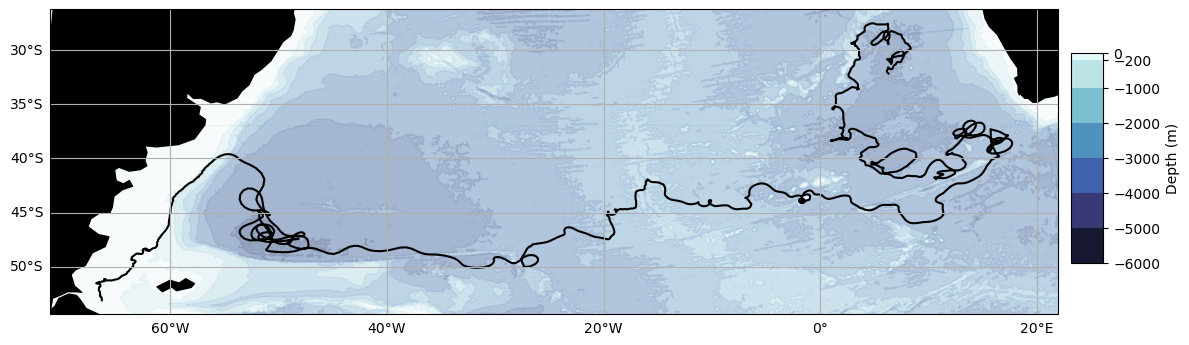

In [36]:
fig, ax = funk.bathymetry_plot(alpha=0.1)

for i in idx_particles:
    ax.plot(sim['lon'][i, :], sim['lat'][i, :], label=i, c='k')

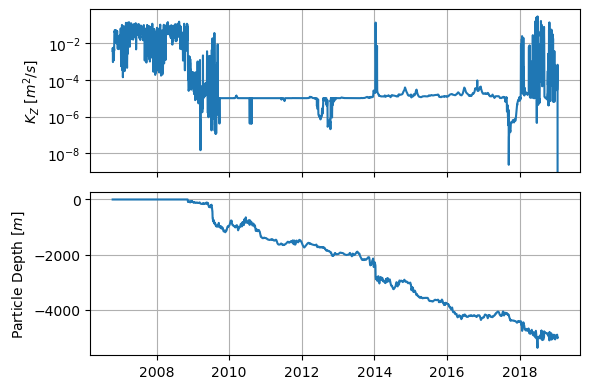

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(6, 4), sharex=True, tight_layout=True)

for i in idx_particles:
    ax[0].semilogy(sim['time'][i, :], sim['kz'][i, :], label=i)
    ax[1].plot(sim['time'][i, :], -sim['z'][i, :], label=i)
    
ax[0].set_ylabel(r'$K_Z$ [$m^2/s$]')
ax[1].set_ylabel(r'Particle Depth [$m$]')
ax[0].grid()
ax[1].grid()

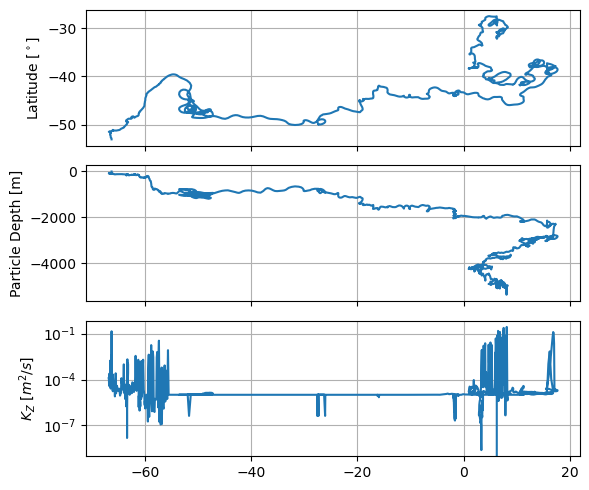

In [46]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(6, 5), sharex=True, tight_layout=True)

for i in idx_particles:
    ax[0].plot(sim['lon'][i, :], sim['lat'][i, :], label=i)
    ax[1].plot(sim['lon'][i, :], -sim['z'][i, :], label=i)
    ax[2].semilogy(sim['lon'][i, :], sim['kz'][i, :], label=i)
    
ax[0].set_ylabel(r'Latitude [$^\circ$]')
ax[1].set_ylabel(r'Particle Depth [m]')
ax[2].set_ylabel(r'$K_Z$ [$m^2/s$]')
ax[0].grid()
ax[1].grid()
ax[2].grid()

OBS: Only one particle out of $2^{13}$ particles managed to drift from the surface to the deep ocean without fragmenting during it drift time. It took it around ten years to do so, and the signinficant downwelling of the particles happend when the particle experineced high values of $K_z$. For PET nanoplastics, it could be possible for these particles to sink into the abyss duw to mixing of water masses.